<a href="https://colab.research.google.com/github/udy53/hfgkjagdsf/blob/main/1st_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dataset @ http://finance.yahoo.com/quote/MSFT/history/


In [ ]:
#imports all the datas from the MSFT.csv
import pandas as pd 
df= pd.read_csv('MSFT.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400
...,...,...,...,...,...,...,...
9146,2022-06-27,268.209991,268.299988,263.279999,264.890015,264.890015,24615100
9147,2022-06-28,263.980011,266.910004,256.320007,256.480011,256.480011,27295500
9148,2022-06-29,257.589996,261.970001,255.759995,260.260010,260.260010,20069800
9149,2022-06-30,257.049988,259.529999,252.899994,256.829987,256.829987,31730900


In [ ]:
df=df[ ['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9146,2022-06-27,264.890015
9147,2022-06-28,256.480011
9148,2022-06-29,260.260010
9149,2022-06-30,256.829987


In [ ]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9146    2022-06-27
9147    2022-06-28
9148    2022-06-29
9149    2022-06-30
9150    2022-07-01
Name: Date, Length: 9151, dtype: object

In [ ]:
import datetime
def str_to_datetime(s):
  split=s.split('-')
  year,month,day=int(split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year=year,month=month,day=day)

datetime_object =str_to_datetime('1986-03-19')
datetime_object
datetime.datetime(1986,3,19,0,0)

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9146   2022-06-27
9147   2022-06-28
9148   2022-06-29
9149   2022-06-30
9150   2022-07-01
Name: Date, Length: 9151, dtype: datetime64[ns]

In [ ]:
df['Date']


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9146   2022-06-27
9147   2022-06-28
9148   2022-06-29
9149   2022-06-30
9150   2022-07-01
Name: Date, Length: 9151, dtype: datetime64[ns]

In [ ]:
df.index=df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-06-27,264.890015
2022-06-28,256.480011
2022-06-29,260.260010


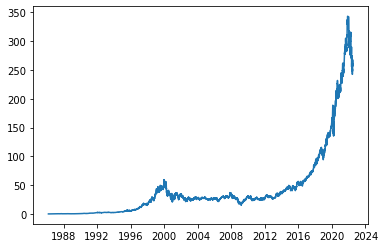

In [ ]:
import matplotlib.pyplot as plt
plt.plot( df.index,df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-18'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-18', 
                                '2022-05-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-18,234.809998,237.710007,237.039993,230.720001
1,2021-03-19,237.710007,237.039993,230.720001,230.350006
2,2021-03-22,237.039993,230.720001,230.350006,235.990005
3,2021-03-23,230.720001,230.350006,235.990005,237.580002
4,2021-03-24,230.350006,235.990005,237.580002,235.460007
...,...,...,...,...,...
294,2022-05-17,255.350006,261.119995,261.500000,266.820007
295,2022-05-18,261.119995,261.500000,266.820007,254.080002
296,2022-05-19,261.500000,266.820007,254.080002,253.139999
297,2022-05-20,266.820007,254.080002,253.139999,252.559998


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:,0]
  middle_matrix =df_as_np[ :,1:-1]
  X=middle_matrix.reshape((len(dates),middle_matrix.shape[1],1))

  Y=df_as_np[:,-1]

  return dates, X.astype(np.float32), Y.astype(np.float32)
dates, X, y=windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((299,), (299, 3, 1), (299,))

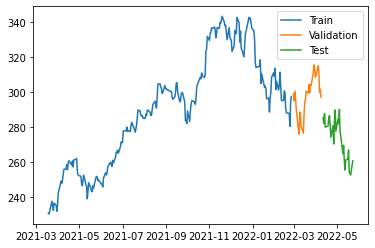

In [ ]:
q_80=int(len(dates)* .8)
q_90=int(len(dates)*.9)

dates_train, X_train, y_train=dates[:q_80],X[:q_80],y[:q_80]

dates_val,X_val,y_val=dates[q_80:q_90],X[q_80:q_90],y[q_80:q_90]
dates_test,X_test,y_test=dates[q_90:],X[q_90:],y[q_90:]


plt.plot(dates_train,y_train)
plt.plot(dates_val,y_val)
plt.plot(dates_test,y_test)

plt.legend(['Train','Validation','Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import layers

model= Sequential([layers.Input((3,1)),
                   layers.LSTM(64),
                   layers.Dense(32,activation='relu'),
                   layers.Dense(32,activation='relu'),
                   layers.Dense(1)])
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100)

Epoch 1/100
8/8 [==============================] - 2s 74ms/step - loss: 84909.5156 - mean_absolute_error: 289.7683 - val_loss: 88650.5000 - val_mean_absolute_error: 297.5382
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 84740.1562 - mean_absolute_error: 289.4761 - val_loss: 88480.0000 - val_mean_absolute_error: 297.2516
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 84574.3828 - mean_absolute_error: 289.1884 - val_loss: 88289.4922 - val_mean_absolute_error: 296.9310
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 84371.6406 - mean_absolute_error: 288.8381 - val_loss: 88047.2656 - val_mean_absolute_error: 296.5227
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 84069.2188 - mean_absolute_error: 288.3112 - val_loss: 87621.1641 - val_mean_absolute_error: 295.8034
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 83591.5000 - mean_absolute_error: 287.4852 - val_loss: 87038.50

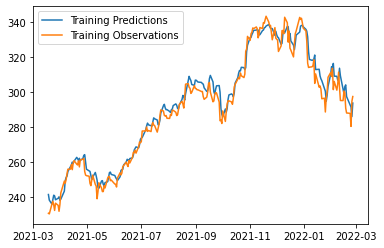

In [ ]:
train_predictions= model.predict(X_train).flatten()

plt.plot(dates_train,train_predictions)
plt.plot(dates_train,y_train)
plt.legend([ 'Training Predictions','Training Observations'])



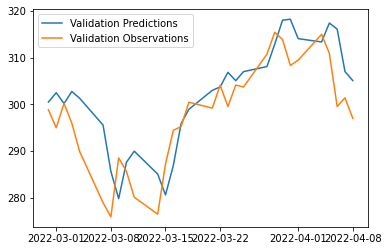

In [ ]:
val_predictions=model.predict(X_val).flatten()

plt.plot(dates_val,val_predictions)
plt.plot(dates_val,y_val)
plt.legend(['Validation Predictions','Validation Observations'])

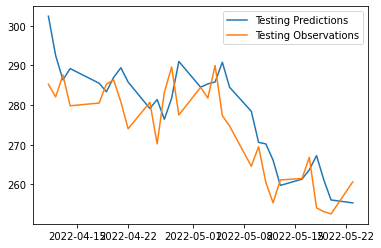

In [ ]:
test_predictions=model.predict(X_test).flatten()

plt.plot(dates_test,test_predictions)
plt.plot(dates_test,y_test)
plt.legend(['Testing Predictions','Testing Observations'])

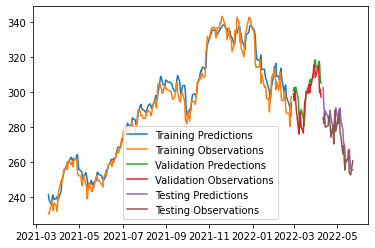

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val,y_val)
plt.plot(dates_test,test_predictions)
plt.plot(dates_test,y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predections',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions=[]
recursive_dates =np.concatenate([dates_val,dates_test])

for target_date in recursive_dates:
  last_window=deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([ last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1]=next_prediction

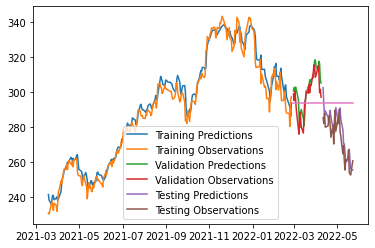

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val,y_val)
plt.plot(dates_test,test_predictions)
plt.plot(dates_test,y_test)
plt.plot(recursive_dates,recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predections',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])